Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Dataset Head:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Missing Values:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


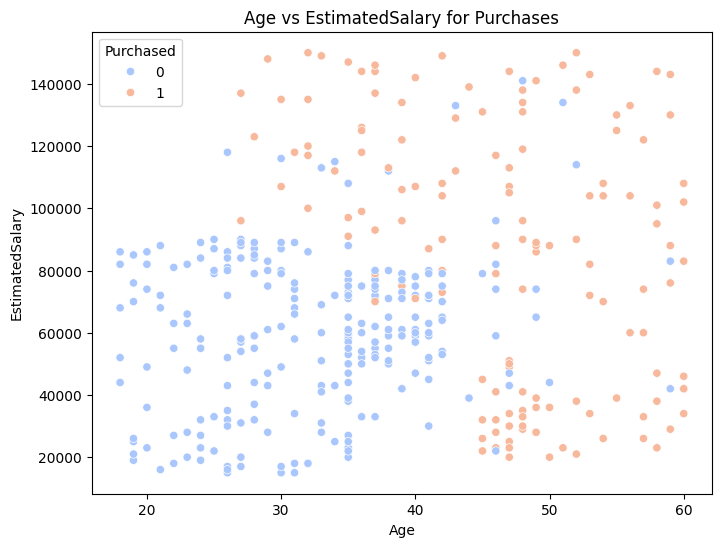


Confusion Matrix:
[[50  2]
 [ 9 19]]

Performance Metrics:
True Positive (TP): 19
False Positive (FP): 2
True Negative (TN): 50
False Negative (FN): 9
Accuracy: 0.8625
Error Rate: 0.1375
Precision: 0.9048
Recall: 0.6786
F1 Score: 0.7755


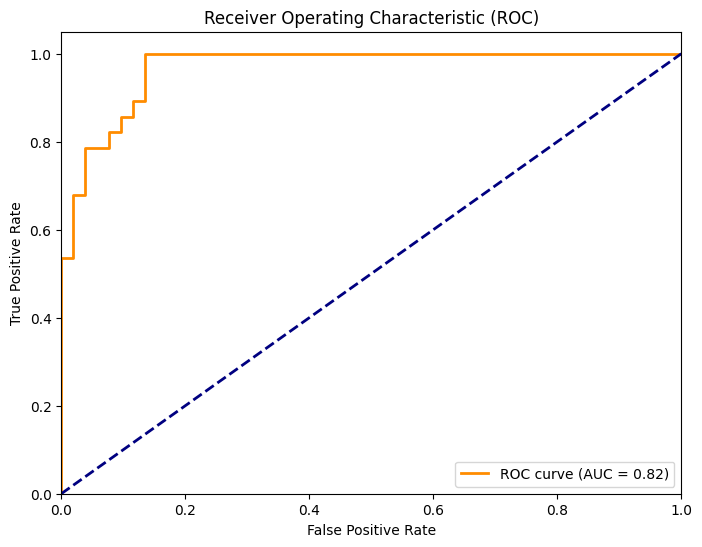

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Load the dataset
file_path = r"C:\Users\comp\Documents\DSBDA PRACTICALS\DSBDA\5th_practical/Social_Network_Ads.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

print("\nDataset Head:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)
# Visualizing the relationship between Age and EstimatedSalary
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data, palette='coolwarm')
plt.title('Age vs EstimatedSalary for Purchases')
plt.show()

# Prepare the data for training
# Features and target variable
X = data[['Age', 'EstimatedSalary']]  # Features (Age, EstimatedSalary)
y = data['Purchased']  # Target variable (Purchased: 0 or 1)

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(cm)

print("\nPerformance Metrics:")
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
